**IMPORT LIBARIES**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.ticker import MaxNLocator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

**LOAD DATA**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving CarPrice_Assignment.csv to CarPrice_Assignment.csv


In [ ]:
import pandas as pd
df = pd.read_csv('CarPrice_Assignment.csv')
df.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


**CHECK DATA STATUS**

Let's start from checking data with .info()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

Data looking good with no null values. But to predicting car price we don't need car_ID or CarName so i will drop it because we already have 26 columns.

In [ ]:
df.drop(['car_ID', 'CarName'], axis=1, inplace=True)
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 symboling           0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

We will need to change object columns into float or interger to do correlation matrix. I will use LabelEncoder in this case because i don't want to make way too much columns.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Make a copy from original dataframe
df_encoded = df.copy()

# Encode object columns
label_encoder = LabelEncoder()
for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col])

Let's check the data info after

In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    int64  
 2   aspiration        205 non-null    int64  
 3   doornumber        205 non-null    int64  
 4   carbody           205 non-null    int64  
 5   drivewheel        205 non-null    int64  
 6   enginelocation    205 non-null    int64  
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    int64  
 13  cylindernumber    205 non-null    int64  
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    int64  
 16  boreratio         205 non-null    float64
 1

Alright everything is ready to go now.

**Visualization**

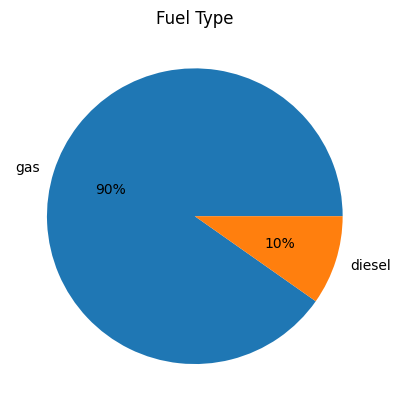

In [ ]:
data = df['fueltype'].value_counts()
plt.pie(data, labels=data.index, autopct='%.0f%%')
plt.title("Fuel Type")

plt.show()

The 90% of cars use diesel fuel.

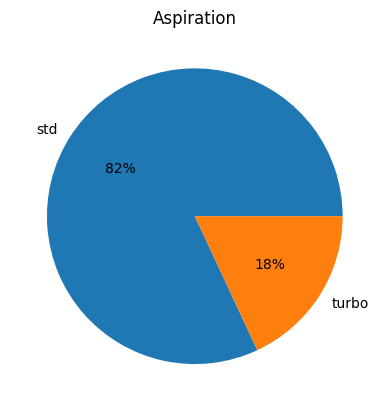

In [ ]:
data = df['aspiration'].value_counts()
plt.pie(data, labels=data.index, autopct='%.0f%%')
plt.title("Aspiration")

plt.show()

We can see from the pie chart that 82% of cars have naturally aspirated engines that draw in air naturally.The 18% of cars have forced induction through a turbocharger.

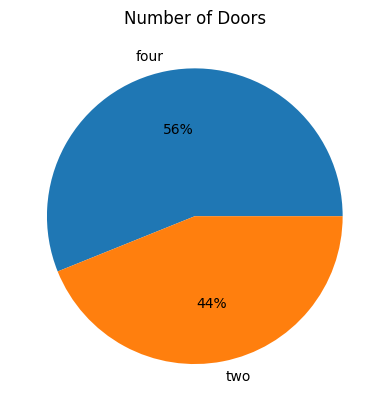

In [ ]:
data = df['doornumber'].value_counts()
plt.pie(data, labels=data.index, autopct='%.0f%%')
plt.title("Number of Doors")

plt.show()

Most of the cars have 4 doors.

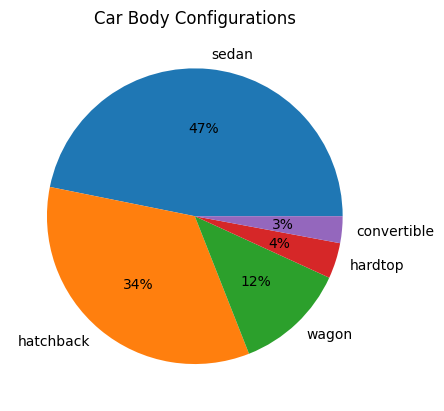

In [ ]:
data = df['carbody'].value_counts()
plt.pie(data, labels=data.index, autopct='%.0f%%')
plt.title("Car Body Configurations")

plt.show()

/tmp/ipython-input-2307157762.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  chart = sns.countplot(x=df['carbody'], palette='Set1')


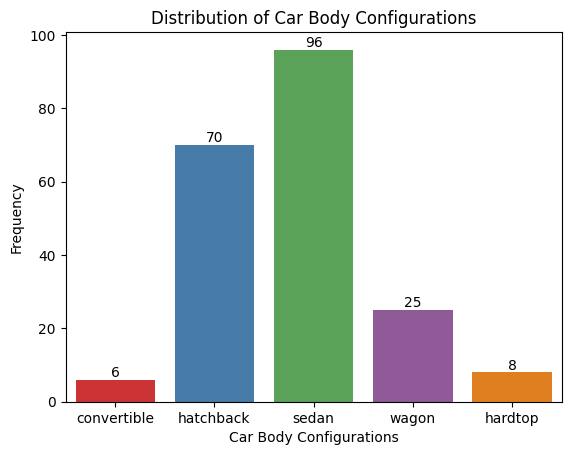

In [ ]:
chart = sns.countplot(x=df['carbody'], palette='Set1')

plt.title("Distribution of Car Body Configurations")
plt.ylabel("Frequency")
plt.xlabel("Car Body Configurations")

for container in chart.containers:
        chart.bar_label(container)

plt.show()

The majority of cars(47% or 96 cars) have Sedan body configurations.Only 6 cars have convertible body.

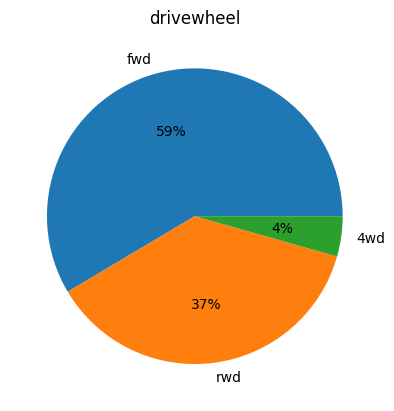

In [ ]:
data = df['drivewheel'].value_counts()
plt.pie(data, labels=data.index, autopct='%.0f%%')
plt.title("drivewheel")

plt.show()

The majority of the cars in the dataset (59%) are equipped with front-wheel drive. Rear-wheel drive vehicles account for approximately 37% of the data, while only about 4% have four-wheel drive.

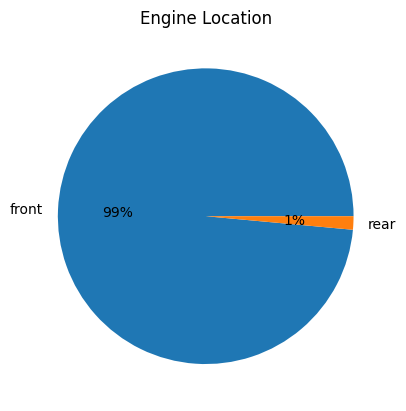

In [ ]:
data = df['enginelocation'].value_counts()
plt.pie(data, labels=data.index, autopct='%.0f%%')
plt.title("Engine Location")

plt.show()

The engines of 99% of the cars in this dataset are located in the front, while only 1% have their engines in the rear.

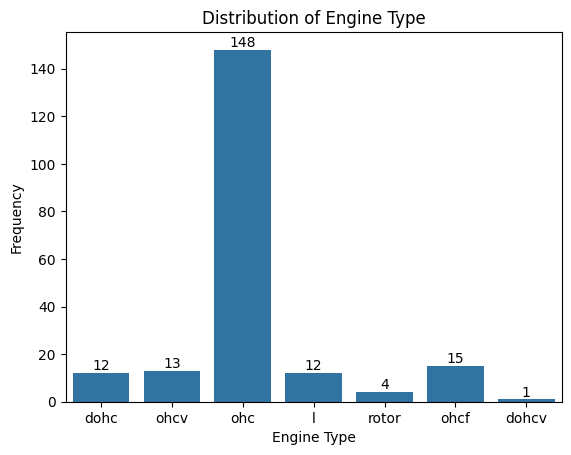

In [ ]:
chart = sns.countplot(x=df['enginetype'])
plt.title("Distribution of Engine Type")
plt.ylabel("Frequency")
plt.xlabel("Engine Type")

for container in chart.containers:
        chart.bar_label(container)

plt.show()

The majority of cars have an overhead camshaft(ohc) engine type.

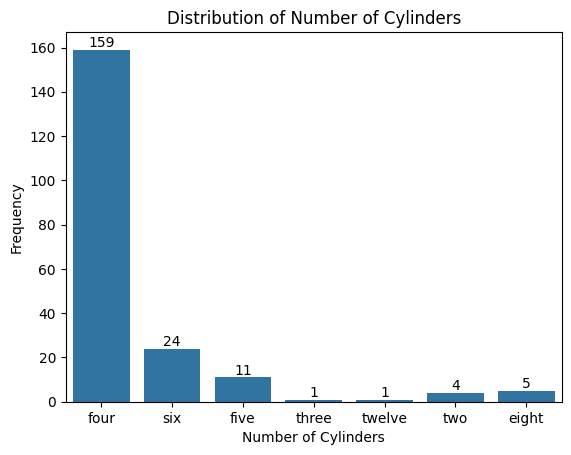

In [ ]:
chart = sns.countplot(x=df['cylindernumber'])

plt.title("Distribution of Number of Cylinders")
plt.ylabel("Frequency")
plt.xlabel("Number of Cylinders")

for container in chart.containers:
        chart.bar_label(container)

plt.show()

The most common number of cylinders is four, with 159 cars having four cylinders. Cars with three and twelve cylinders are less frequent.

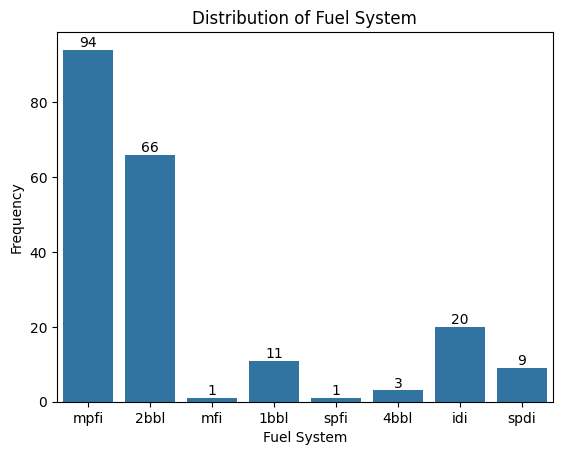

In [ ]:
chart = sns.countplot(x=df['fuelsystem'])

plt.title("Distribution of Fuel System")
plt.ylabel("Frequency")
plt.xlabel("Fuel System")

for container in chart.containers:
        chart.bar_label(container)

plt.show()

The engine of the majority of cars have multi-point fuel injection (MPFI) system with 94 instances.This is followed by 2-Barrel system(2bbl) with 66 cars.Other fuel systems like idi, 1bbl, and spdi appear less frequently, while mfi, spfi, and 4bbl are rare.

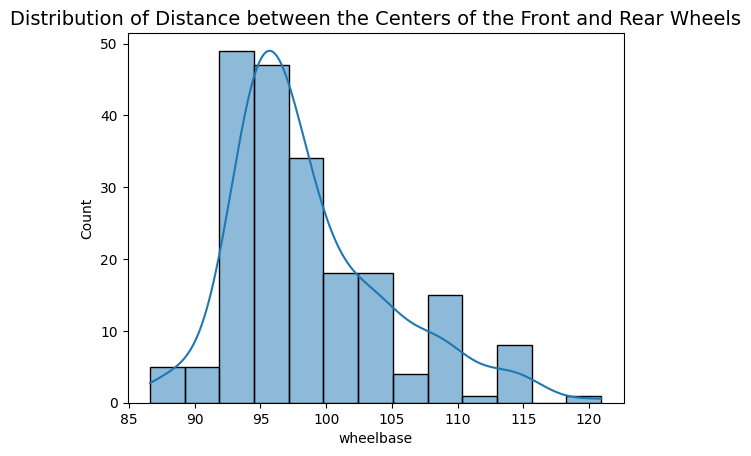

In [ ]:
plt.title('Distribution of Distance between the Centers of the Front and Rear Wheels', fontsize=14)

sns.histplot(data=df, x='wheelbase', kde=True)

plt.show()

According to the plot, the wheelbase of most cars ranges between 92 and 97 inches.

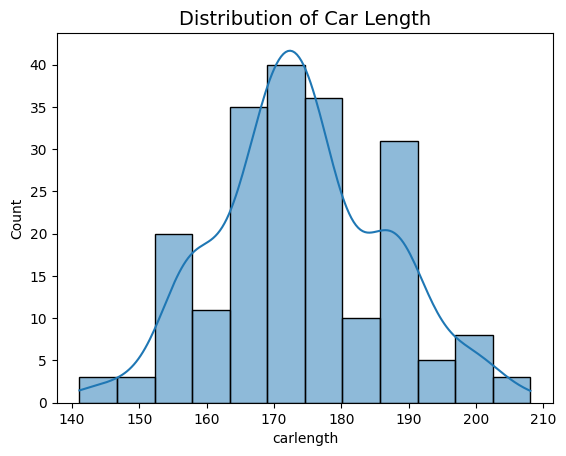

In [ ]:
plt.title('Distribution of Car Length', fontsize=14)

sns.histplot(data=df, x='carlength', kde=True)

plt.show()

The plot shows that the majority of cars in this dataset have a length between 170 and 175 inches.

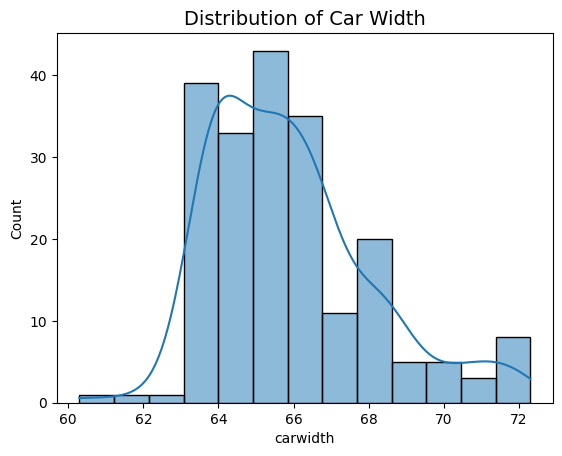

In [ ]:
plt.title('Distribution of Car Width', fontsize=14)

sns.histplot(data=df, x='carwidth', kde=True)

plt.show()

The plot shows that the majority of cars in this dataset have a width between 63 and 66 inches.

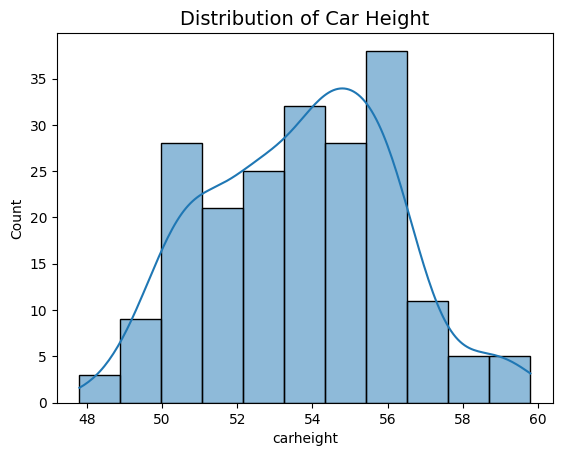

In [ ]:
plt.title('Distribution of Car Height', fontsize=14)

sns.histplot(data=df, x='carheight', kde=True)

plt.show()

The most common range for car height is between 52 and 56 inches.

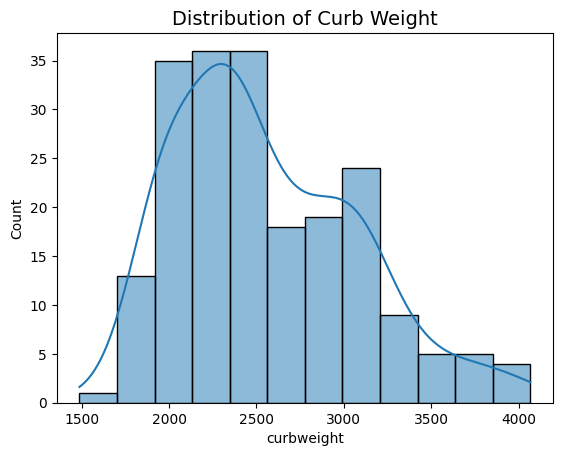

In [ ]:
plt.title('Distribution of Curb Weight', fontsize=14)

sns.histplot(data=df, x='curbweight', kde=True, bins=12)

plt.show()

Based on this distribution plot, most cars have a curb weight ranging from 2000 to 2500 lbs.

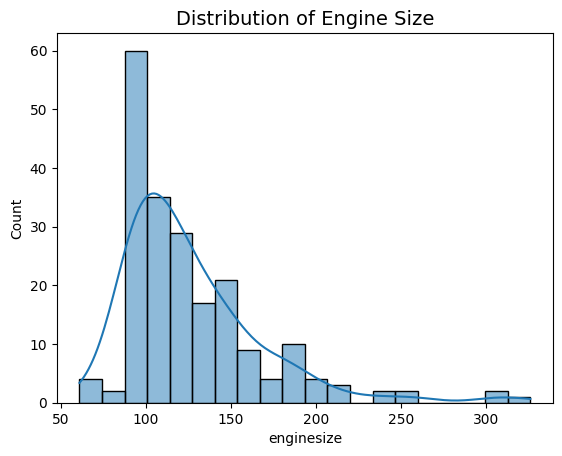

In [ ]:
plt.title('Distribution of Engine Size', fontsize=14)

sns.histplot(data=df, x='enginesize', bins=20, kde=True)

plt.show()

The engine size of most cars in the dataset falls within the range of 85 to 115 cc.

/tmp/ipython-input-740560280.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.boreratio, shade=True, color='purple', alpha=0.5, ax = ax)


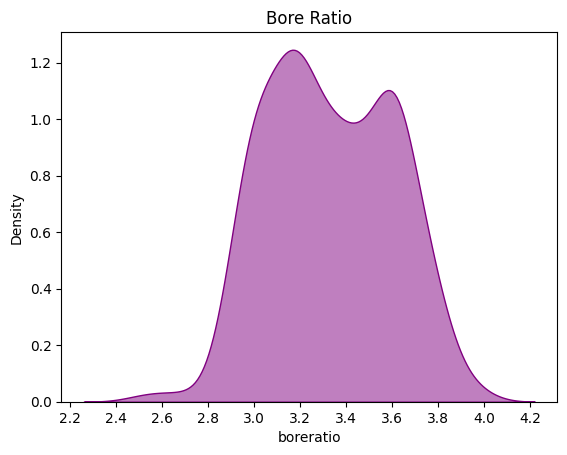

In [ ]:
fig, ax = plt.subplots()
sns.kdeplot(df.boreratio, shade=True, color='purple', alpha=0.5, ax = ax)

ax.xaxis.set_major_locator(MaxNLocator(nbins=12))

plt.title('Bore Ratio')
plt.show()

/tmp/ipython-input-2751724382.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.stroke, shade=True, color='purple', alpha=0.5, ax = ax)


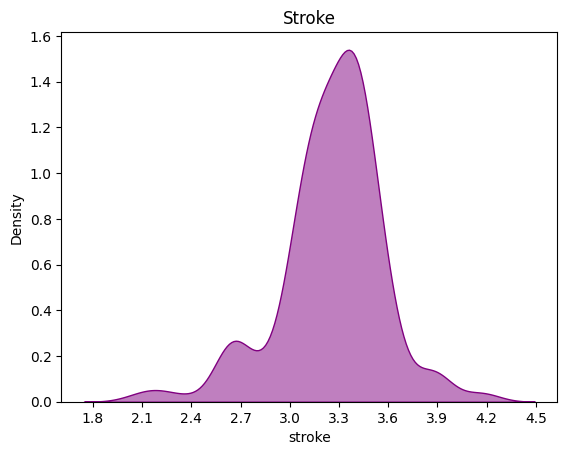

In [ ]:
fig, ax = plt.subplots()
sns.kdeplot(df.stroke, shade=True, color='purple', alpha=0.5, ax = ax)

ax.xaxis.set_major_locator(MaxNLocator(nbins=12))

plt.title('Stroke')
plt.show()

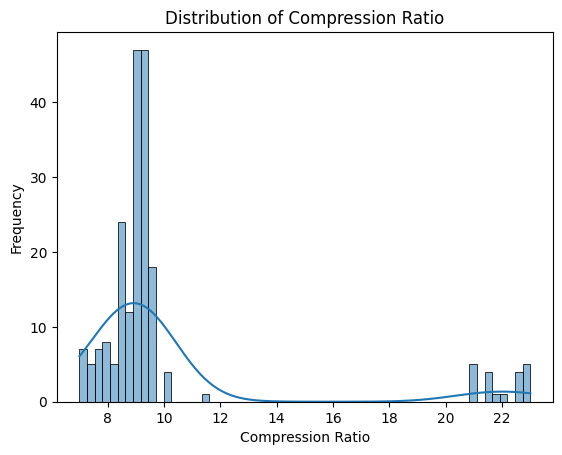

In [ ]:
sns.histplot(df['compressionratio'], kde=True)
plt.title("Distribution of Compression Ratio")
plt.xlabel("Compression Ratio")
plt.ylabel("Frequency")
plt.show()

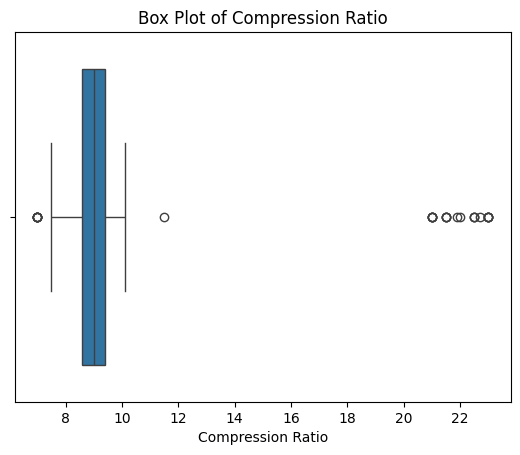

In [ ]:
sns.boxplot(x=df['compressionratio'])
plt.title("Box Plot of Compression Ratio")
plt.xlabel("Compression Ratio")
plt.show()

According to the plot, the majority of cars have a compression ratio between 8 and 10.

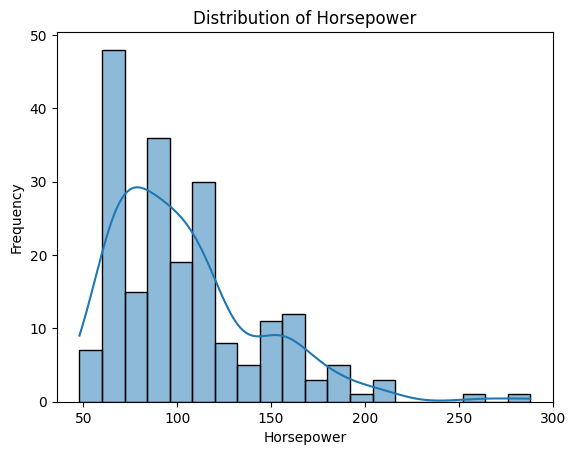

In [ ]:
sns.histplot(df['horsepower'], bins=20, kde=True)

plt.xlabel("Horsepower")
plt.ylabel("Frequency")
plt.title("Distribution of Horsepower")

plt.show()

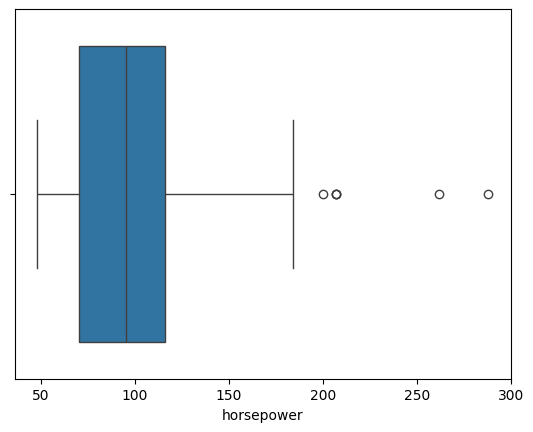

In [ ]:
sns.boxplot(x=df.horsepower)

plt.show()

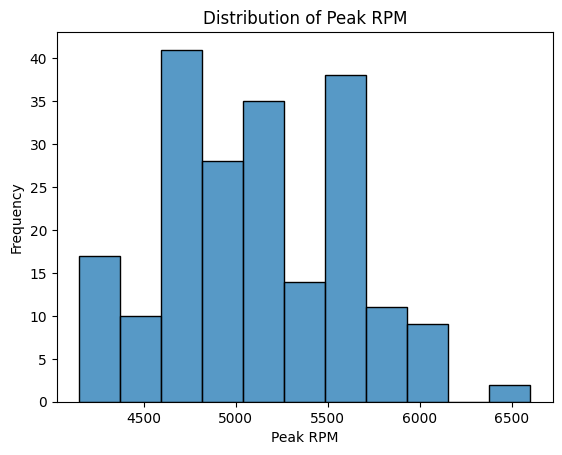

In [ ]:
sns.histplot(df['peakrpm'])

plt.xlabel("Peak RPM")
plt.ylabel("Frequency")
plt.title("Distribution of Peak RPM")

plt.show()

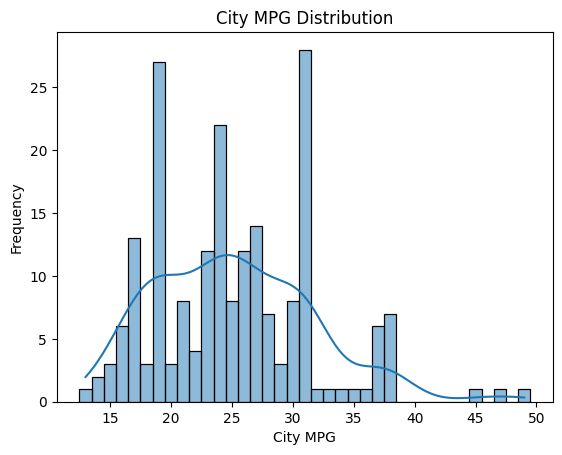

In [ ]:
sns.histplot(df['citympg'], kde=True, discrete=True)

plt.xlabel("City MPG")
plt.ylabel("Frequency")
plt.title("City MPG Distribution")

plt.show()

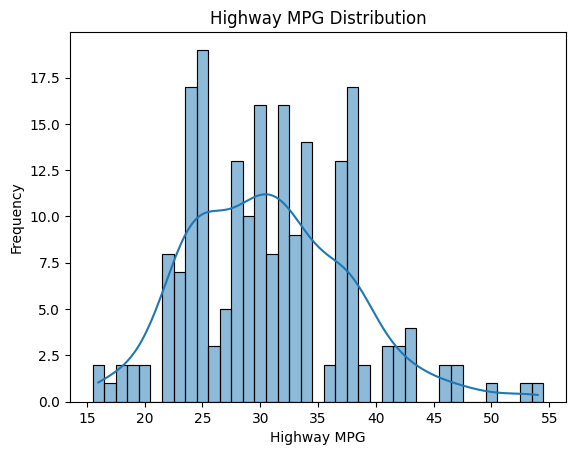

In [ ]:
sns.histplot(df['highwaympg'], kde=True, discrete=True)

plt.xlabel("Highway MPG")
plt.ylabel("Frequency")
plt.title("Highway MPG Distribution")

plt.show()

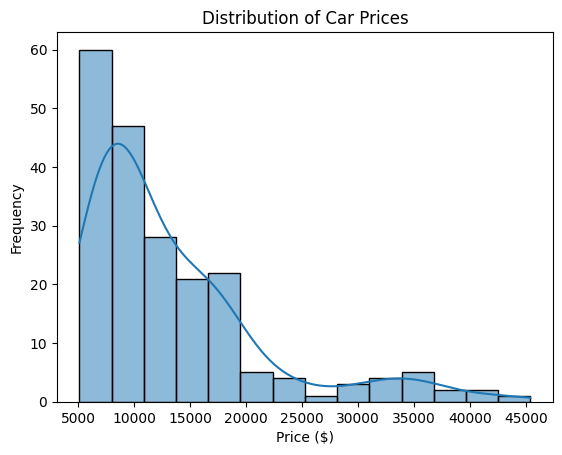

In [ ]:
#sns.kdeplot(car_df.price, shade=True, color='purple', alpha=0.5)
sns.histplot(data=df, x='price', kde=True)

plt.xlabel("Price ($)")
plt.ylabel("Frequency")
plt.title("Distribution of Car Prices")

plt.show()

The highest frequency of car prices is around **$5,000–$7,500**, with over 60 cars in that range.

**Correlation Matrix**

In [ ]:
#Correlation Matrix
corr_matrix = df_encoded.corr()
print(corr_matrix)

                  symboling  fueltype  aspiration  doornumber   carbody  \
symboling          1.000000  0.194311   -0.059866    0.664073 -0.596135   
fueltype           0.194311  1.000000   -0.401397    0.191491 -0.147853   
aspiration        -0.059866 -0.401397    1.000000   -0.031792  0.063028   
doornumber         0.664073  0.191491   -0.031792    1.000000 -0.680358   
carbody           -0.596135 -0.147853    0.063028   -0.680358  1.000000   
drivewheel        -0.041671 -0.132257    0.066465    0.098954 -0.155745   
enginelocation     0.212471  0.040070   -0.057191    0.137757 -0.277009   
wheelbase         -0.531954 -0.308346    0.257611   -0.447357  0.401362   
carlength         -0.357612 -0.212679    0.234539   -0.398568  0.334433   
carwidth          -0.232919 -0.233880    0.300567   -0.207168  0.131710   
carheight         -0.541038 -0.284631    0.087311   -0.552208  0.568534   
curbweight        -0.227691 -0.217275    0.324902   -0.197379  0.128467   
enginetype         0.0503

Let's make everything easier to look at

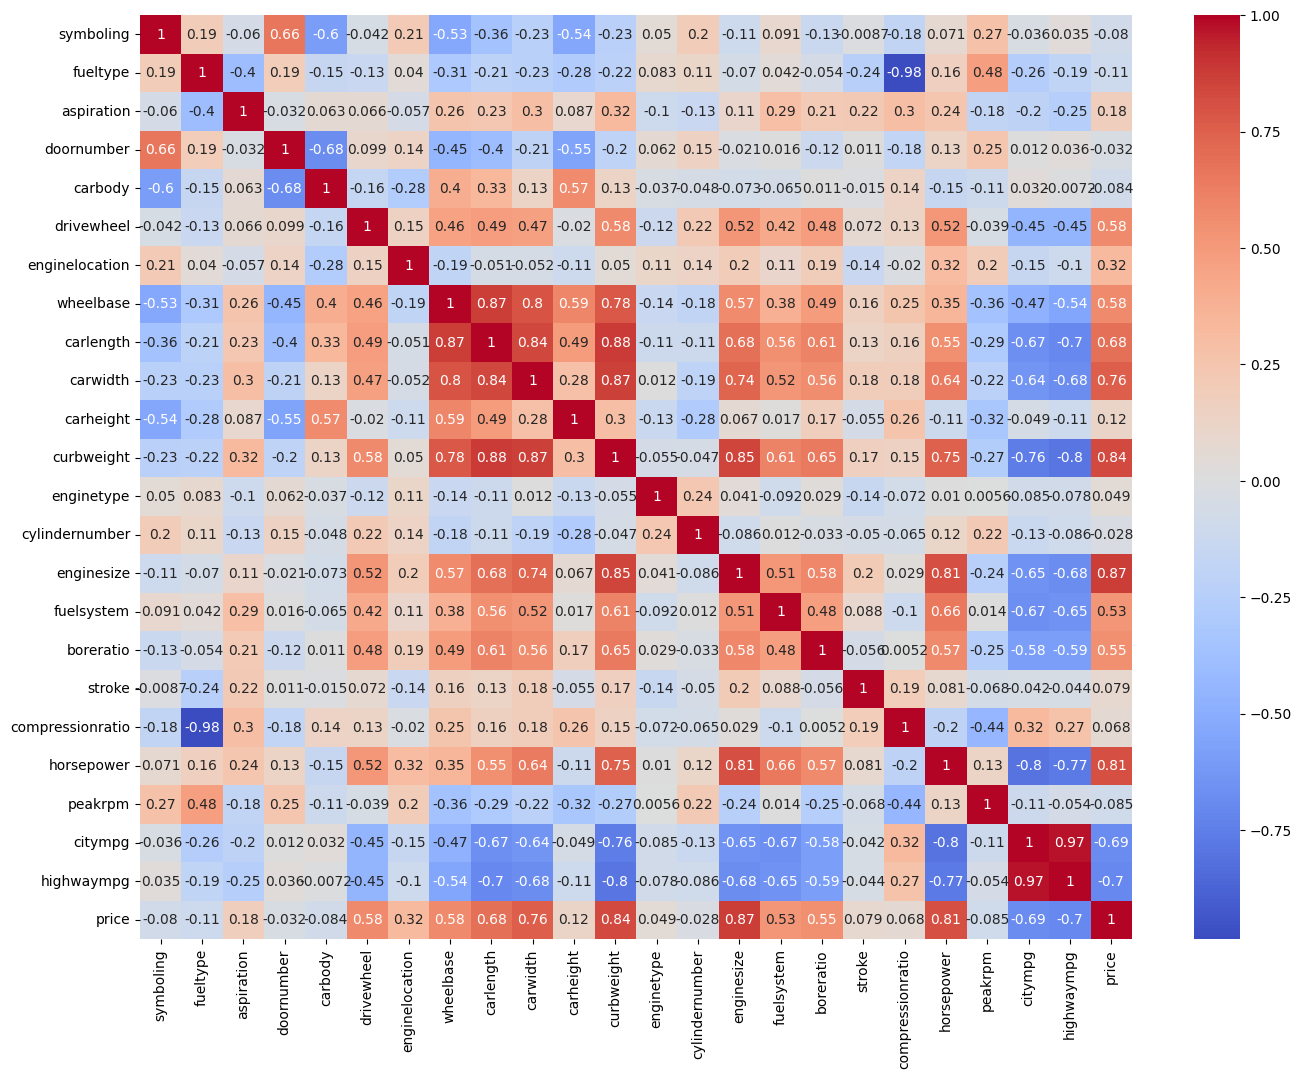

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16,12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

I've forgot to remove outliers. Let's do that and run the matrix again to see the different.

In [ ]:
# Remove outliers with IQR for all df_encoded
def remove_outliers_iqr(df_encoded):
    for col in df_encoded.columns:
        Q1 = df_encoded[col].quantile(0.25)
        Q3 = df_encoded[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_encoded = df_encoded[(df_encoded[col] >= lower_bound) & (df_encoded[col] <= upper_bound)]
    return df_encoded

# Perform removal outliers
df_clean = remove_outliers_iqr(df_encoded)

print("Rows before remove:", len(df_encoded))
print("Rows after remove:", len(df_clean))

Rows before remove: 205
Rows after remove: 85


Looks like we've got many outliers, which could disturb our result. Now let see the different in correlation matrix.

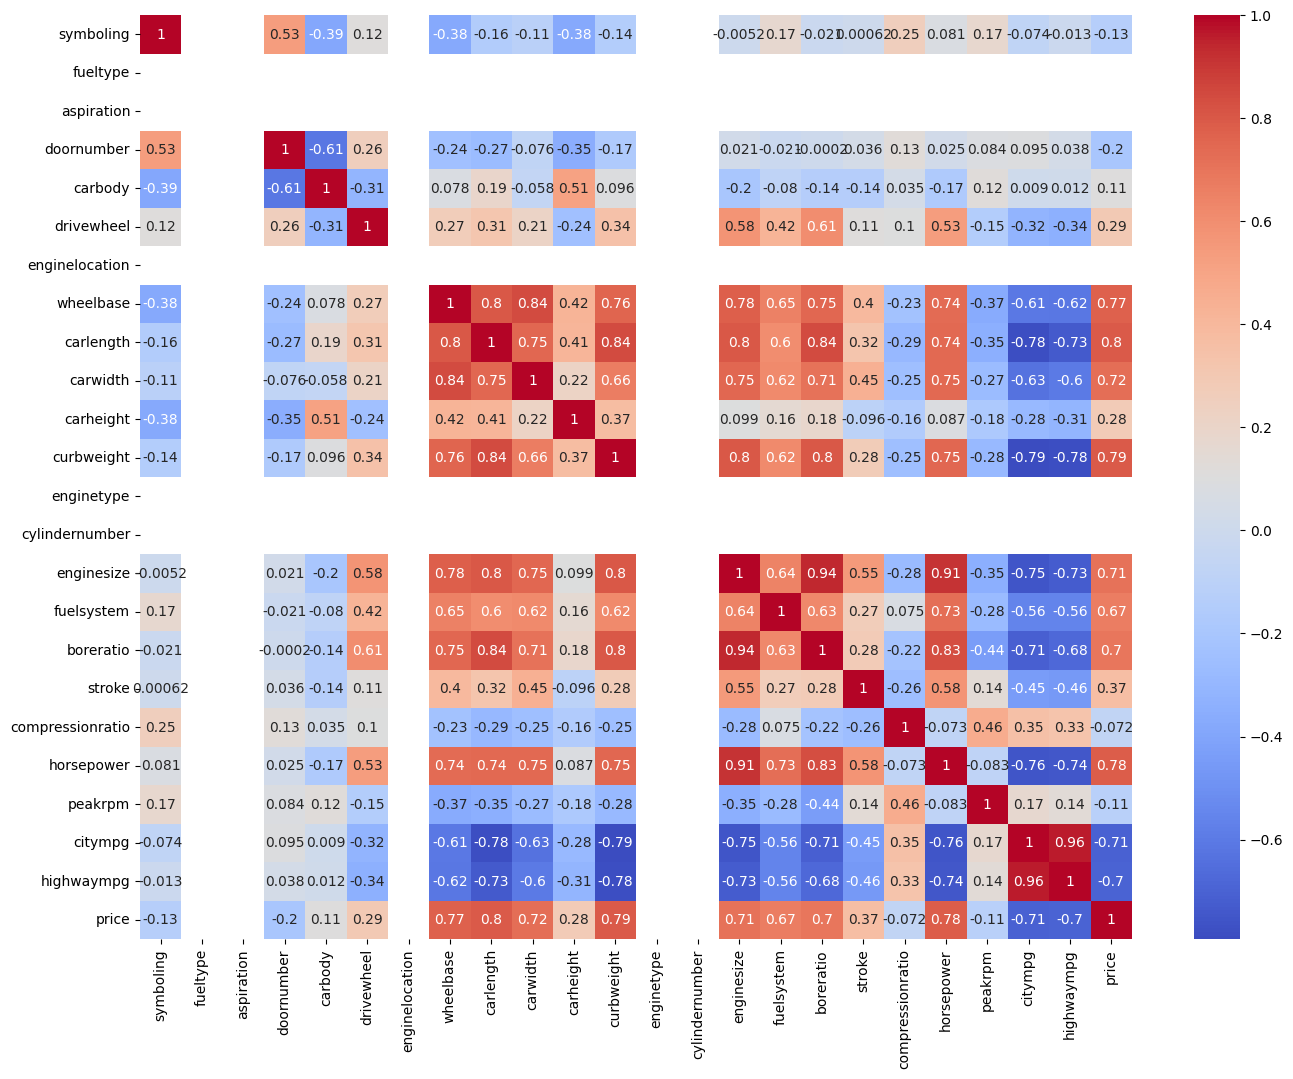

In [ ]:
clean_corr_matrix = df_clean.corr()
plt.figure(figsize=(16,12))
sns.heatmap(clean_corr_matrix, annot=True, cmap='coolwarm')
plt.show()


After comparison, I will keep the outliers because it's impact the data too much. Also I want to analyze the entire market, including specialty products.

**Feature Importance**

Assign data to x & y

In [ ]:
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

Here i will use the F-test to select top 10 features have the highest correlation level.

In [ ]:
selector = SelectKBest(score_func=f_regression, k=10)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("Top Features:\n", selected_features)

Top Features:
 Index(['drivewheel', 'wheelbase', 'carlength', 'carwidth', 'curbweight',
       'enginesize', 'boreratio', 'horsepower', 'citympg', 'highwaympg'],
      dtype='object')


After get top 10 features i will only using them to predicting car price. To continue I will use StandardScaler to help feature have the same scale and split the data to train set and test set.

**Linear Regression**

In [ ]:
X = df_encoded[selected_features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred_lr = model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Results:")
print(f"MSE: {mse_lr:.2f}")
print(f"R² Score: {r2_lr:.2f}")

Linear Regression Results:
MSE: 13633543.46
R² Score: 0.83


Let's make a scatter plot chart for this model

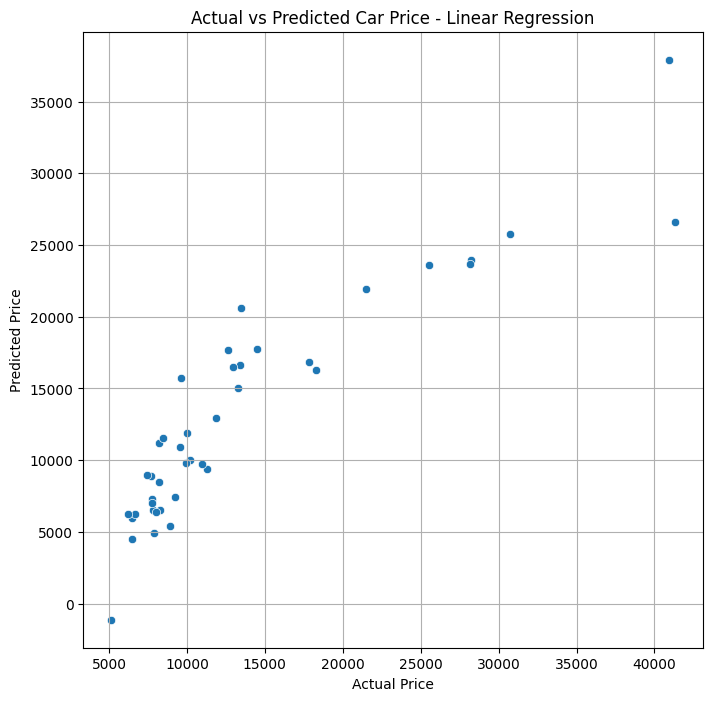

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=y_test, y=y_pred_lr)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Price - Linear Regression")
plt.grid(True)
plt.show()

Let's try different model.

**XGBoost**

Initialize XGBoost model

In [ ]:
xgb_model = XGBRegressor(
    n_estimators=200,
    random_state=42
)

In [ ]:
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

Now let's see the result of this model

In [ ]:
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Results:")
print(f"MSE: {mse_xgb:.2f}")
print(f"R² Score: {r2_xgb:.2f}")

XGBoost Results:
MSE: 4875914.44
R² Score: 0.94


Let's make a scatter plot chart for this model

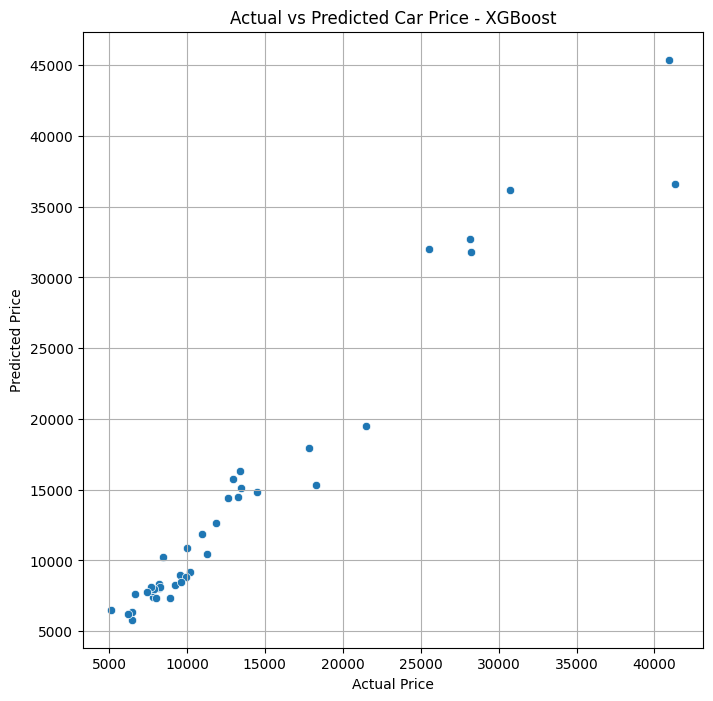

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=y_test, y=y_pred_xgb)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Price - XGBoost")
plt.grid(True)
plt.show()

This chart look more decent than Linear Regression, especially in low-mid range price.

Let's take one more look at Random Forest model if there is any different.

**Random Forest**

Initialize XGBoost model

In [ ]:
rf_model = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

Now let's see the result of this model

In [ ]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Results:")
print(f"MSE: {mse_rf:.2f}")
print(f"R² Score: {r2_rf:.2f}")

Random Forest Results:
MSE: 3357044.66
R² Score: 0.96


Let's make a scatter plot chart for this model

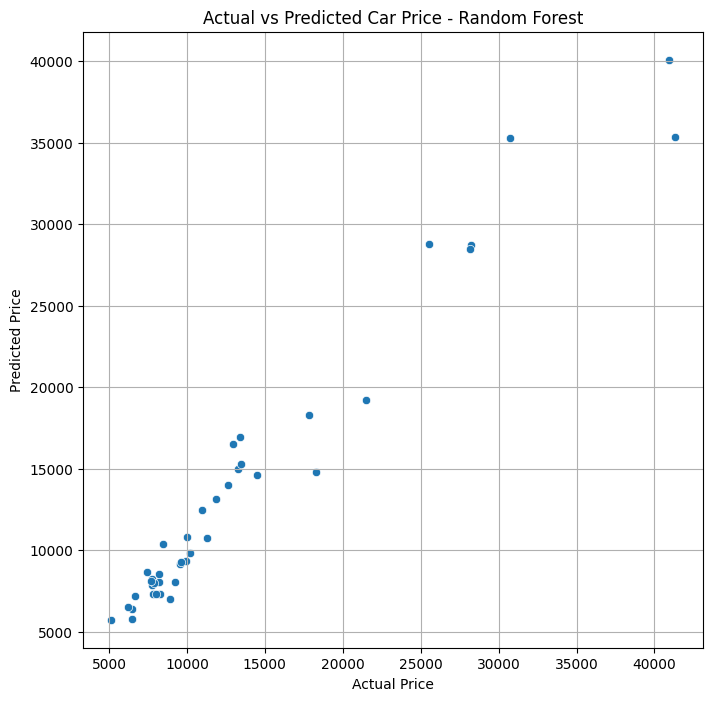

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Price - Random Forest")
plt.grid(True)
plt.show()

This chart show Random Forest Model made pretty good prediction, even better than XGBoost. Fewer strong outliers, no predictions that are too far off from the actual data.

**Conclusion:**

- Random Forest Model is best fit to predict car price in this dataset

**PREDICTION**

After selecting Random Forest as the best-performing model for predicting car prices, we used the trained pipeline to make predictions on the test dataset. The predicted prices were then compared with the actual prices to evaluate the model’s performance.

In [ ]:
# Make predictions using the trained Random Forest model
y_pred = rf_model.predict(X_test)

# Display a sample of the predicted prices alongside actual prices
predictions_df = pd.DataFrame({
    'Actual Price': y_test,
    'Predicted Price': y_pred
})

print(predictions_df.head())

     Actual Price  Predicted Price
15      30760.000      35298.02750
9       17859.167      18267.53500
100      9549.000       9151.19500
132     11850.000      13142.27625
68      28248.000      28691.27500


Using the trained Random Forest pipeline, we generated price predictions for the test dataset. The table below compares the actual prices with the predicted values, showing that the model is able to estimate car prices with relatively close alignment to real-world values.

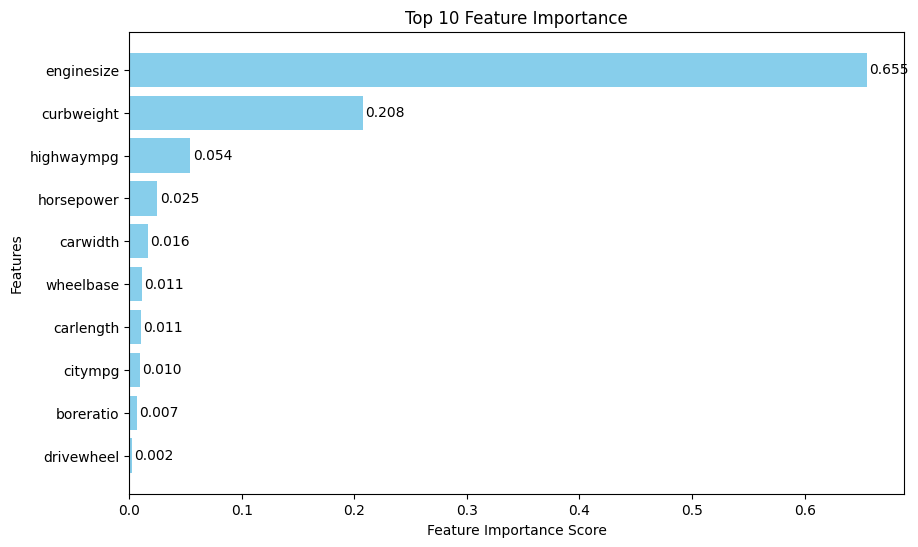

In [ ]:
# 1️⃣ Train Random Forest to get Feature Importance
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X, y)

feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# 2️⃣ Choose 10 as top features
top_n = 10
top_features = feature_importances.head(top_n)

# 3️⃣ Visualization
plt.figure(figsize=(10, 6))
bars = plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title(f"Top {top_n} Feature Importance")

# Add value labels on each column
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.002, bar.get_y() + bar.get_height()/2,
             f"{width:.3f}", va='center')

plt.show()

1. Engine is the most important factor

- enginesize has a highest Feature Importance Score: 0.655. More than 3 times than the second most important factor.

Action: When pricing or classifying vehicles, prioritize collecting and optimizing data related to enginesize. In marketing, it is possible to segment products by enginesize to price appropriately.

2. Vehicle weight also plays an important role

- curbweight is second: 0.208. Meaning that vehicle weight is the second most important factor.

Action: In manufacturing, consider design to achieve a balance between weight and performance. In market analysis, combine enginesize and curbweight to predict price trends.

3. The remaining factors have much smaller impacts

- Variables such as highwaympg, horsepower, carwidth, etc. are all <0.06.

Action: Don't spend too much resources optimizing these variables in your price prediction model, but you can still use them for secondary analysis.

In [ ]:
# Prediction
y_pred = rf_model.predict(X)

# Stats
print("Number of trees:", len(rf_model.estimators_))
print("MSE:", mean_squared_error(y, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y, y_pred)))
print("R² Score:", r2_score(y, y_pred))

Number of trees: 200
MSE: 728526.7583740694
RMSE: 853.5377896578858
R² Score: 0.9885290228619804


**Actionable Insights**

1. Model Deployment

- Use the Random Forest model into an web application for users to enter vehicle information and get instant predicted prices.

- Integrate into car buying and selling platforms to support fast valuation.

2. Data Enrichment

- Collect more new data from the market, especially high-end models, to improve forecasting in the high-price segment.

- Add factors such as vehicle condition, maintenance history, v.v to make the model more accurate.

3. Performance Tracking

- Periodically re-evaluate the model with new real-world data to ensure high accuracy. If performance drops, retrain the model with updated data.

4. User Guidance

- Use feature importance analysis to advise car sellers on which factors have the strongest influence on price.
